# Pymaceuticals Inc.
---

### Analysis

1. Outlier Identification: Outlined circles effectively highlight extreme data points, aiding outlier identification within the dataset.2. 
Visual Emphasis: Contrasting colors draw attention to outliers, making them visually prominent within the boxplot.3. 
Data Distribution Insights: The boxplot provides a concise summary of the dataset's distribution, including key statistical measures such as the median, quartiles, and rangs4. e.
Regression Line Interpretation: The linear regression line provides a visual representation of the relationship between mouse weight and average tumor volume. Its slope indicates the rate of change in tumor volume per unit change in weight, while the intercept represents the estimated tumor volume when weight is z
5. 
The correlation coefficient between mouse weight and average tumor volume is 0.84, indicating a strong positive correlation between these two variables. This suggests that as mouse weight increases, the average tumor volume tends to increase as well.ero.
 

In [191]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [165]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [166]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_rows = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID"])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [169]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

249

## Summary Statistics

In [170]:

# Group by 'Drug Regimen' and calculate the mean, median, variance, standard deviation, and SEM of the tumor volume
summary_statistics = merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename the columns for clarity
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics table
print(summary_statistics)



                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [171]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Group by 'Drug Regimen' and calculate the mean, median, variance, standard deviation, and SEM of the tumor volume
# Using the aggregation method, produce the same summary statistics in a single line

# In this method, a lambda function will calculate the SEM (Standard Error of the Mean) within the agg() method.
# This lambda function calculates the SEM directly from the grouped data. This approach keeps the calculation concise and within a single line of code.

summary_statistics = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('SEM', lambda x: x.sem())])

# Display the summary statistics table
print(summary_statistics)




                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

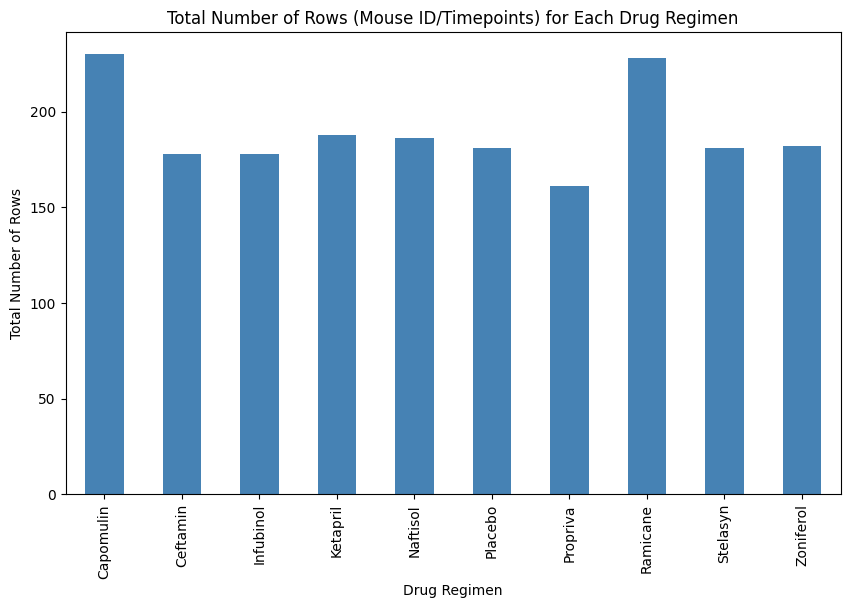

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen = merge_df.groupby('Drug Regimen').size()

# Create a bar plot 
rows_per_regimen.plot(kind='bar', color='steelblue', figsize=(10, 6))

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Show plot
plt.show()


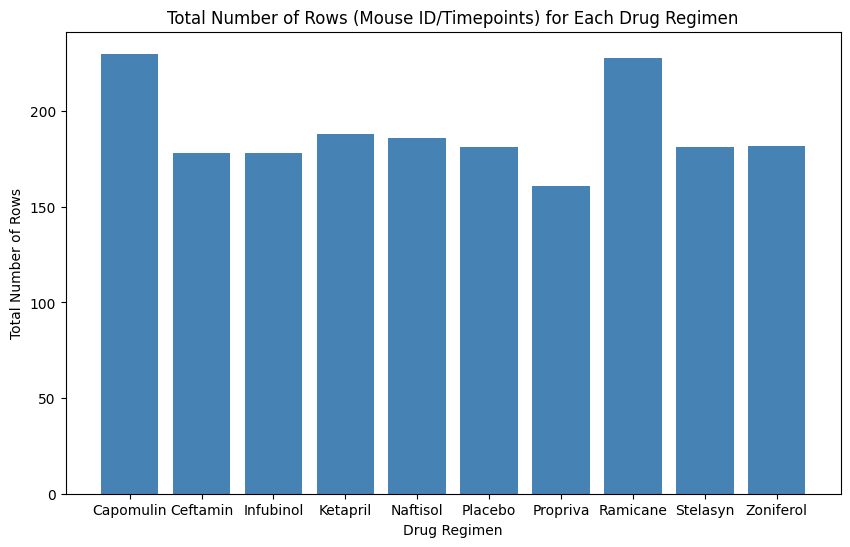

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows_per_regimen = merge_df.groupby('Drug Regimen').size()

# Extract drug regimens and corresponding row counts
drug_regimens = rows_per_regimen.index
row_counts = rows_per_regimen.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, row_counts, color='steelblue')

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Show plot
plt.show()

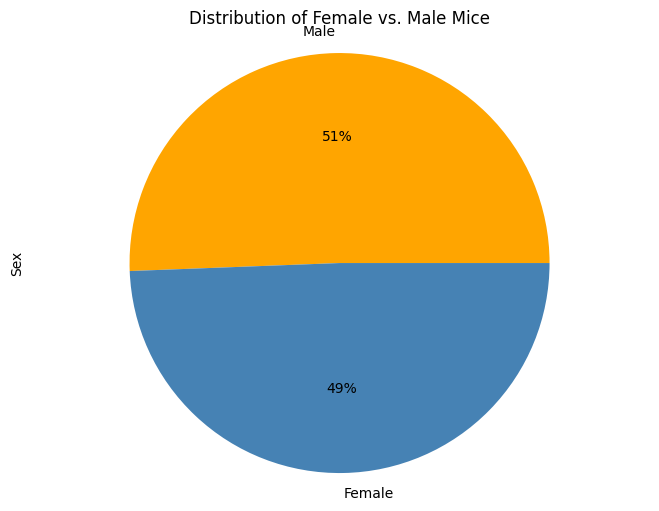

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by 'Sex' and count the number of mice in each category
sex_distribution = merge_df['Sex'].value_counts()

# Create a pie plot using Pandas
sex_distribution.plot(kind='pie', autopct='%1.0f%%', colors=['orange', 'steelblue'], figsize=(8, 6), title='Distribution of Female vs. Male Mice', ylabel='')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.ylabel('Sex')
plt.show()


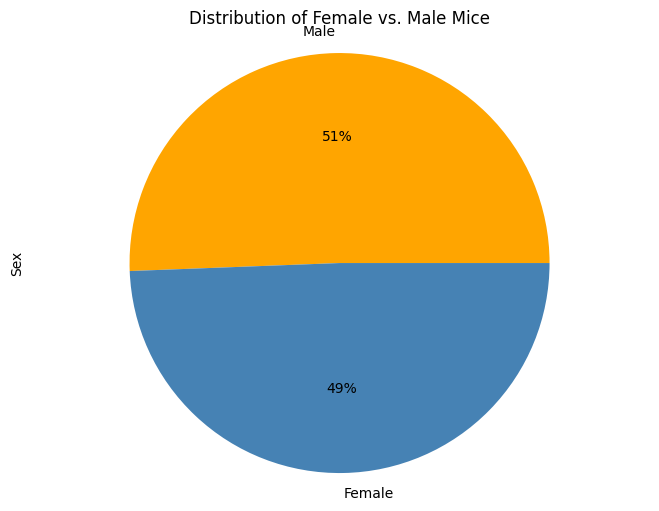

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by 'Sex' and count the number of mice in each category
sex_distribution = merge_df['Sex'].value_counts()

# Define colors for female and male mice
colors = ['orange', 'steelblue']

# Create a pie plot using pyplot
plt.figure(figsize=(8, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.0f%%', colors=colors)

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [197]:
# Start by getting the last (greatest) timepoint for each mouse

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = merge_df[merge_df['Drug Regimen'].isin(selected_regimens)]

# Group by 'Mouse ID' and get the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, merge_df, on=['Mouse ID', 'Timepoint'])

# Display the final tumor volume of each mouse across the selected treatment regimens
final_tumor_volume.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [230]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
        # Append the tumor volume data to the list add subset
    tumor_vol_data.append(tumor_vol)
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
   
     # Determine outliers using upper and lower bounds
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers for each treatment regimen
    print(f"{treatment}'s potential outliers: {outliers}")


   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


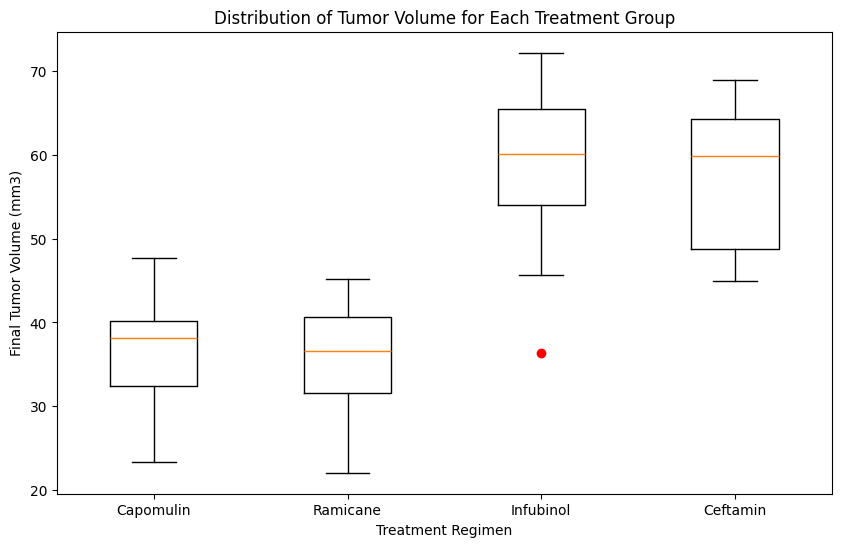

In [209]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, sym = "r")

# Add labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show plot
plt.show()


## Line and Scatter Plots

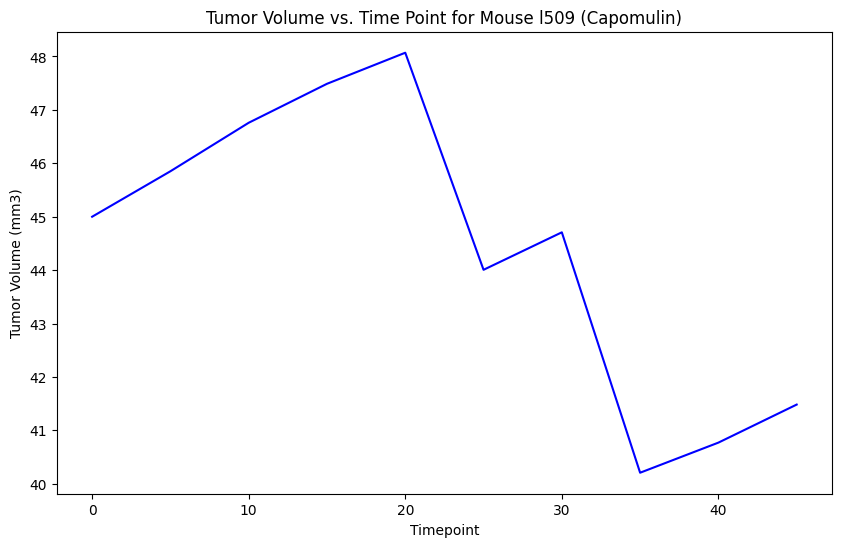

In [234]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a single mouse treated with Capomulin
mouse_id = 'l509'

# Filter the DataFrame to get the data for that mouse treated with Capomulin
mouse_data = merge_df[(merge_df['Drug Regimen'] == 'Capomulin') & (merge_df['Mouse ID'] == mouse_id)]

# Plot tumor volume vs. time point
plt.figure(figsize=(6, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')

# Show plot
plt.grid(False)
plt.show()

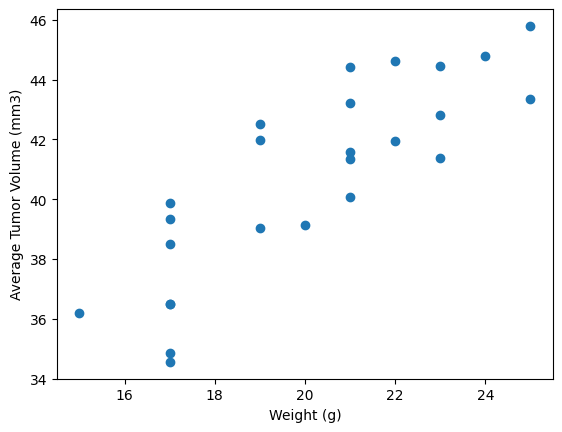

In [247]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weights, average_tumor_volume)

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


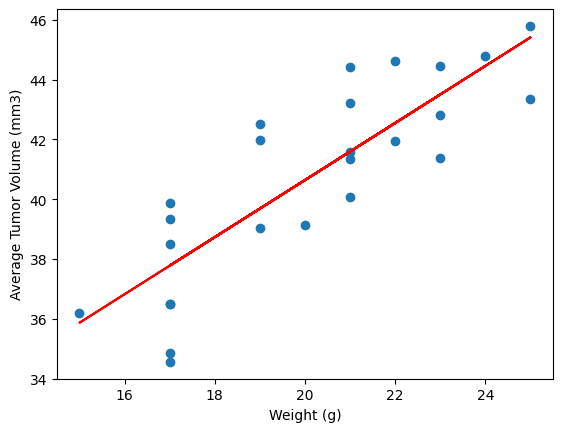

In [249]:

# Calculate the correlation coefficient
correlation = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]
# Display the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

# Create a scatter plot
plt.scatter(mouse_weights, average_tumor_volume)

# Add the linear regression line to the plot
regress_values = slope * mouse_weights + intercept
plt.plot(mouse_weights, regress_values, color='red')

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()